In [1]:
from src.preprocessing.preprocess_ucr import UCRDatasetImporter
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings
from src.models.classification import SVM_VQVAE, evaluate_classifier, BaseVQVAE

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader, test_data_loader = [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

input_length = train_data_loader.dataset.X.shape[-1]

#Data
X_train = train_data_loader.dataset.X
Y_train = train_data_loader.dataset.Y

X_test = test_data_loader.dataset.X
Y_test = test_data_loader.dataset.Y

#z_q and their indeces. Also the codebook
base = BaseVQVAE(input_length, config)
z_q_train, ind_train = base.run_through_codebook(train_data_loader)
z_q_test, ind_test = base.run_through_codebook(test_data_loader)
codebook = base.vq_model.codebook

self.X_train.shape: (500, 128)
self.X_test.shape: (625, 128)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [3]:
#the sizes
z_q_train.shape, ind_train.shape, codebook.shape




((500, 2560), torch.Size([116, 40]), torch.Size([32, 64]))

In [4]:
Y_train.shape

(500, 1)

In [14]:
pca = PCA(n_components=5)

z_q_train_pca = pca.fit_transform(z_q_train)
z_q_train_pca.shape

z_q_test_pca = pca.fit_transform(z_q_test)

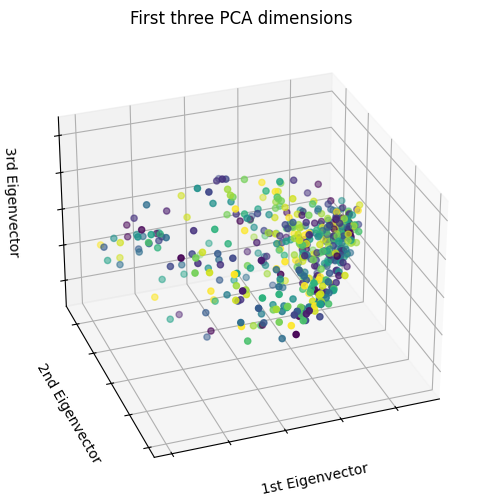

In [18]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
scatter = ax.scatter(z_q_train_pca[:, 0], 
                     z_q_train_pca[:, 1],
                     z_q_train_pca[:, 2], 
                     c=Y_train)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

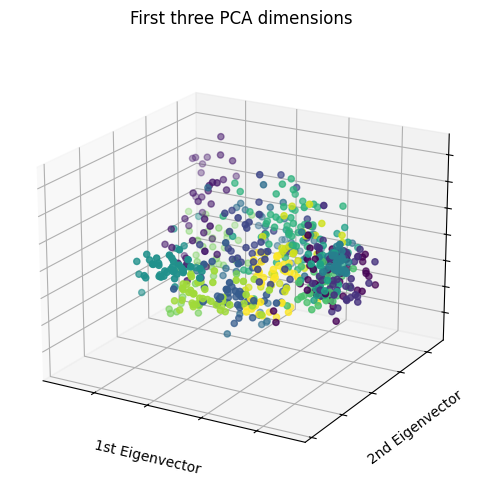

In [25]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-160, azim=60)
scatter = ax.scatter(z_q_test_pca[:, 0], 
                     z_q_test_pca[:, 1],
                     z_q_test_pca[:, 4], 
                     c=Y_test)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

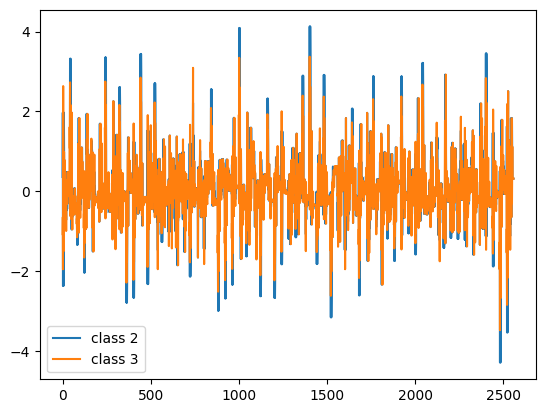

In [8]:
fix, ax = plt.subplots()
ax.plot(z_q_train[12], label = "class 2")
# ax.plot(z_q_train[2], label = "class 1")
ax.plot(z_q_train[15], label = "class 3")
ax.legend()
plt.show()